# Mathematical Underpinnings - Lab 2

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ... = (a - 1)^2 + \sigma^2$,

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return (a - 1) ** 2 + sigma_eps ** 2

### b)

In [3]:
# sampling
X = scipy.stats.norm.rvs(loc=0, scale=1, size=50)
eps = scipy.stats.norm.rvs(loc=0, scale=1, size=50)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean(np.square(a * x - y))

### c)

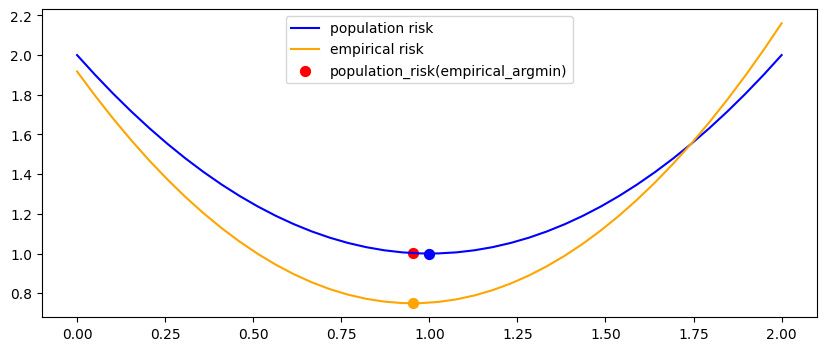

In [5]:
# code, plot
aa = np.linspace(0, 2, 40)
population_risk_values = [population_risk(a, 1) for a in aa]
empirical_risk_values = [empirical_risk(a, X, Y) for a in aa]

opt_result = scipy.optimize.minimize(lambda x: population_risk(x, 1), 0)
population_min = opt_result.fun
population_argmin = opt_result.x[0]

opt_result = scipy.optimize.minimize(lambda x: empirical_risk(x, X, Y), 0)
empirical_min = opt_result.fun
empirical_argmin = opt_result.x[0]

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(aa, population_risk_values, label="population risk", c="blue")
ax.plot(aa, empirical_risk_values, label="empirical risk", c="orange")
ax.scatter([population_argmin], [population_min], s=50, c="blue")
ax.scatter([empirical_argmin], [empirical_min], s=50, c="orange")
ax.scatter([empirical_argmin], [population_risk(empirical_argmin, 1)], s=50, c="red", label="population_risk(empirical_argmin)")
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [6]:
# excess risk
population_risk(empirical_argmin, 1) - population_risk(population_argmin, 1)

0.002225856064867804

In [7]:
# simulations with fixed sample size
excess_risk_arr = np.zeros(200)

for i in range(200):
    X = scipy.stats.norm.rvs(loc=0, scale=1, size=50)
    eps = scipy.stats.norm.rvs(loc=0, scale=1, size=50)
    Y = X + eps

    opt_result = scipy.optimize.minimize(lambda x: empirical_risk(x, X, Y), 0)
    empirical_argmin = opt_result.x[0]
    excess_risk = population_risk(empirical_argmin, 1) - population_risk(population_argmin, 1)
    excess_risk_arr[i] = excess_risk

np.mean(excess_risk_arr)

0.019315181646447344

In [8]:
# simulations for various sample sizes
records = []

for n in range(50, 2001, 50):
    excess_risk_arr = np.zeros(500)

    for i in range(500):
        X = scipy.stats.norm.rvs(loc=0, scale=1, size=n)
        eps = scipy.stats.norm.rvs(loc=0, scale=1, size=n)
        Y = X + eps

        opt_result = scipy.optimize.minimize(lambda x: empirical_risk(x, X, Y), 0)
        empirical_argmin = opt_result.x[0]
        excess_risk = population_risk(empirical_argmin, 1) - population_risk(population_argmin, 1)
        excess_risk_arr[i] = excess_risk

    records.append({
        "n": n,
        "excess_risk": np.mean(excess_risk_arr),
    })

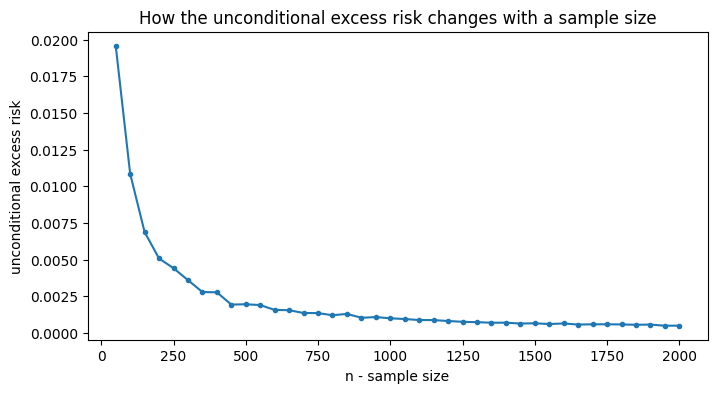

In [9]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

df = pd.DataFrame(records)
ax.plot(df["n"], df["excess_risk"], marker=".")
ax.set_xlabel("n - sample size")
ax.set_ylabel("unconditional excess risk")
ax.set_title("How the unconditional excess risk changes with a sample size")
plt.show()